# Kmodes analysis
install pre reqs

In [56]:
#https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering
#pip install kmodes plotnine matplotlib scipy seaborn missingno plotly pyod pythresh gower


In [57]:
from kmodes.kmodes import KModes
import sklearn as skl

import pandas as pd

#df = pd.read_csv("iocs-export.csv",header=None,on_bad_lines='skip')
#https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data
df = pd.read_csv("iocs-export.csv",delimiter=';', skiprows=0, low_memory=False)
#https://stackoverflow.com/questions//python-pandas-error-tokenizing-data

In [58]:
print('Dimension data: {} rows and {} columns'.format(len(df), len(df.columns)))
# Print the first 5 rows
df.head()

Dimension data: 33790 rows and 21 columns


ip  port protocol                            version  xorkey  \
0     81.95.5.146   443    https   Cobalt Strike 3.6 (Dec 08, 2016)     105   
1  122.116.41.237    80     http   Cobalt Strike 3.6 (Dec 08, 2016)     105   
2   51.255.42.170    80      dns   Cobalt Strike 3.4 (Jul 29, 2016)     105   
3    51.38.187.74   443    https   Cobalt Strike 3.8 (May 23, 2017)     105   
4   54.147.59.212    80     http  Cobalt Strike 3.10 (Dec 11, 2017)     105   

                                             domains   host_header  \
0                                        81.95.5.146           NaN   
1                                     122.116.41.237           NaN   
2  cdn.incdigest.com, freepics.incdigest.com, pro...           NaN   
3                                       51.38.187.74           NaN   
4                          ww2.foodprepsolutions.com  www.imdb.com   

   first_seen   last_seen  delta_days  ...     asn  \
0  2018-07-04  2018-11-26         145  ...  201011   
1  2018-07-04  2018-07-04           0  ...    3462   
2  2018-07-04  2018-12-05         154  ...   16276   
3  2018-07-04  2018-07-04           0  ...   16276   
4  2018-07-04  2018-08-16          43  ...   14618   

                                 org  \
0           AS33891 Netzbetrieb GmbH   
1  Data Communication Business Group   
2                            OVH SAS   
3                            OVH SAS   
4                         AMAZON-AES   

                                          user_agent  \
0  Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....   
1  Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...   
2  Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...   
3  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
4  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   

                      spawnto_x86                      spawnto_x64  \
0  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
1  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
2                               0                                0   
3  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
4  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   

  procinj_execute                                          submituri  \
0               0  /safebrowsing/rd/CINnu27nLO8hbHdfgmUtc2ihdmFyE...   
1               0                                        /submit.php   
2               0                                        /submit.php   
3               0                                        /submit.php   
4               0                                   /name/nm0954753/   

  watermark_hex   modifications is_modified  
0           0x0  modified_trial        True  
1           0x0          normal       False  
2           0x0          normal       False  
3           0x0          normal       False  
4    0x77254a2e          normal       False  

[5 rows x 21 columns]

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33790 entries, 0 to 33789
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ip               33790 non-null  object
 1   port             33790 non-null  int64 
 2   protocol         33790 non-null  object
 3   version          33790 non-null  object
 4   xorkey           33790 non-null  int64 
 5   domains          33784 non-null  object
 6   host_header      9865 non-null   object
 7   first_seen       33790 non-null  object
 8   last_seen        33790 non-null  object
 9   delta_days       33790 non-null  int64 
 10  country          33790 non-null  object
 11  asn              33790 non-null  int64 
 12  org              33790 non-null  object
 13  user_agent       33787 non-null  object
 14  spawnto_x86      33790 non-null  object
 15  spawnto_x64      33790 non-null  object
 16  procinj_execute  33790 non-null  object
 17  submituri        33789 non-null

In [60]:
df.select_dtypes('object').nunique()

ip                 18336
protocol               3
version               19
domains            18563
host_header         2593
first_seen           151
last_seen            150
country               82
org                  713
user_agent          1122
spawnto_x86          295
spawnto_x64          294
procinj_execute      282
submituri           2201
watermark_hex       5117
modifications         17
dtype: int64

In [61]:
df.describe()

port        xorkey    delta_days            asn
count  33790.000000  33790.000000  33790.000000   33790.000000
mean     399.628470     61.134300     26.632998   58348.661675
std     1001.190954     25.916425     56.677063   79128.654958
min       53.000000     46.000000      0.000000      18.000000
25%       80.000000     46.000000      0.000000   16509.000000
50%      443.000000     46.000000      6.000000   36352.000000
75%      443.000000    105.000000     28.000000   53363.000000
max    60000.000000    252.000000   1123.000000  399804.000000

In [62]:
df.isna().sum()

ip                     0
port                   0
protocol               0
version                0
xorkey                 0
domains                6
host_header        23925
first_seen             0
last_seen              0
delta_days             0
country                0
asn                    0
org                    0
user_agent             3
spawnto_x86            0
spawnto_x64            0
procinj_execute        0
submituri              1
watermark_hex          0
modifications          0
is_modified            0
dtype: int64

In [63]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks


In [64]:
df = pd.read_csv("iocs-export.csv",delimiter=';', skiprows=0, low_memory=False)

In [65]:
df.head()

ip  port protocol                            version  xorkey  \
0     81.95.5.146   443    https   Cobalt Strike 3.6 (Dec 08, 2016)     105   
1  122.116.41.237    80     http   Cobalt Strike 3.6 (Dec 08, 2016)     105   
2   51.255.42.170    80      dns   Cobalt Strike 3.4 (Jul 29, 2016)     105   
3    51.38.187.74   443    https   Cobalt Strike 3.8 (May 23, 2017)     105   
4   54.147.59.212    80     http  Cobalt Strike 3.10 (Dec 11, 2017)     105   

                                             domains   host_header  \
0                                        81.95.5.146           NaN   
1                                     122.116.41.237           NaN   
2  cdn.incdigest.com, freepics.incdigest.com, pro...           NaN   
3                                       51.38.187.74           NaN   
4                          ww2.foodprepsolutions.com  www.imdb.com   

   first_seen   last_seen  delta_days  ...     asn  \
0  2018-07-04  2018-11-26         145  ...  201011   
1  2018-07-04  2018-07-04           0  ...    3462   
2  2018-07-04  2018-12-05         154  ...   16276   
3  2018-07-04  2018-07-04           0  ...   16276   
4  2018-07-04  2018-08-16          43  ...   14618   

                                 org  \
0           AS33891 Netzbetrieb GmbH   
1  Data Communication Business Group   
2                            OVH SAS   
3                            OVH SAS   
4                         AMAZON-AES   

                                          user_agent  \
0  Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....   
1  Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...   
2  Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...   
3  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
4  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   

                      spawnto_x86                      spawnto_x64  \
0  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
1  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
2                               0                                0   
3  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
4  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   

  procinj_execute                                          submituri  \
0               0  /safebrowsing/rd/CINnu27nLO8hbHdfgmUtc2ihdmFyE...   
1               0                                        /submit.php   
2               0                                        /submit.php   
3               0                                        /submit.php   
4               0                                   /name/nm0954753/   

  watermark_hex   modifications is_modified  
0           0x0  modified_trial        True  
1           0x0          normal       False  
2           0x0          normal       False  
3           0x0          normal       False  
4    0x77254a2e          normal       False  

[5 rows x 21 columns]

In [66]:
df.columns

Index(['ip', 'port', 'protocol', 'version', 'xorkey', 'domains', 'host_header',
       'first_seen', 'last_seen', 'delta_days', 'country', 'asn', 'org',
       'user_agent', 'spawnto_x86', 'spawnto_x64', 'procinj_execute',
       'submituri', 'watermark_hex', 'modifications', 'is_modified'],
      dtype='object')

In [67]:
df_analysis = df [['ip', 'port', 'protocol', 'version', 'domains', 'host_header', 'delta_days', 'country', 'asn', 'org', 'user_agent', 'spawnto_x86', 'spawnto_x64', 'procinj_execute', 'modifications', 'is_modified']]

In [68]:
#df_analysis['delta_days_bin'] = pd.cut(df_analysis['delta_days'], [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000], 
 #                             labels=['0-100', '100-200', '200-300', '300-400','400-500','500-600','600-700', '700-800','800-900', '900-1000','1000-2000'])
#df_analysis  = df_analysis.drop('delta_days',axis = 1)

In [69]:
#import csv
#export_df.to_csv("iocs-export_sem_index.csv",index=False)
#User agent
#correlação com algum dataset de dominio (com isso é possivel validar se foi utilizado dominio temporario, alexa top1m)
#quantidade de dias que um beacon ficou disponivel na internet
#analise do IP (avaliar se tem alguma API disponivel no trabalho)



#df_analysis.to_csv("test-export.csv", sep=";", quoting=csv.QUOTE_ALL, index=False)

In [70]:
df_analysis.head()

ip  port protocol                            version  \
0     81.95.5.146   443    https   Cobalt Strike 3.6 (Dec 08, 2016)   
1  122.116.41.237    80     http   Cobalt Strike 3.6 (Dec 08, 2016)   
2   51.255.42.170    80      dns   Cobalt Strike 3.4 (Jul 29, 2016)   
3    51.38.187.74   443    https   Cobalt Strike 3.8 (May 23, 2017)   
4   54.147.59.212    80     http  Cobalt Strike 3.10 (Dec 11, 2017)   

                                             domains   host_header  \
0                                        81.95.5.146           NaN   
1                                     122.116.41.237           NaN   
2  cdn.incdigest.com, freepics.incdigest.com, pro...           NaN   
3                                       51.38.187.74           NaN   
4                          ww2.foodprepsolutions.com  www.imdb.com   

   delta_days        country     asn                                org  \
0         145        Germany  201011           AS33891 Netzbetrieb GmbH   
1           0         Taiwan    3462  Data Communication Business Group   
2         154         France   16276                            OVH SAS   
3           0         France   16276                            OVH SAS   
4          43  United States   14618                         AMAZON-AES   

                                          user_agent  \
0  Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....   
1  Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...   
2  Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...   
3  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
4  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   

                      spawnto_x86                      spawnto_x64  \
0  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
1  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
2                               0                                0   
3  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
4  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   

  procinj_execute   modifications  is_modified  
0               0  modified_trial         True  
1               0          normal        False  
2               0          normal        False  
3               0          normal        False  
4               0          normal        False

In [71]:
df_analysis.shape

(33790, 16)

In [72]:
df_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33790 entries, 0 to 33789
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ip               33790 non-null  object
 1   port             33790 non-null  int64 
 2   protocol         33790 non-null  object
 3   version          33790 non-null  object
 4   domains          33784 non-null  object
 5   host_header      9865 non-null   object
 6   delta_days       33790 non-null  int64 
 7   country          33790 non-null  object
 8   asn              33790 non-null  int64 
 9   org              33790 non-null  object
 10  user_agent       33787 non-null  object
 11  spawnto_x86      33790 non-null  object
 12  spawnto_x64      33790 non-null  object
 13  procinj_execute  33790 non-null  object
 14  modifications    33790 non-null  object
 15  is_modified      33790 non-null  bool  
dtypes: bool(1), int64(3), object(12)
memory usage: 3.9+ MB


In [73]:
df_analysis.isnull().sum()*100/df_analysis.shape[0]

ip                  0.000000
port                0.000000
protocol            0.000000
version             0.000000
domains             0.017757
host_header        70.804972
delta_days          0.000000
country             0.000000
asn                 0.000000
org                 0.000000
user_agent          0.008878
spawnto_x86         0.000000
spawnto_x64         0.000000
procinj_execute     0.000000
modifications       0.000000
is_modified         0.000000
dtype: float64

In [74]:
df_analysis_copy = df_analysis.copy()

In [75]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_analysis = df_analysis.apply(le.fit_transform)
df_analysis.head()

ip  port  protocol  version  domains  host_header  delta_days  country  \
0  17601     2         2        9     9874         2593         145       21   
1   2858     1         1        9     2143         2593           0       70   
2  15685     1         0        7    11580         2593         154       20   
3  15687     2         2       11     8953         2593           0       20   
4  16108     1         1        0    17908         2422          43       78   

   asn  org  user_agent  spawnto_x86  spawnto_x64  procinj_execute  \
0  637   33         662          193          182                0   
1   28  169          56          193          182                0   
2  137  459         921          268          263                0   
3  137  459         108          193          182                0   
4  127   21         111          193          182                0   

   modifications  is_modified  
0              4            1  
1             13            0  
2             13            0  
3             13            0  
4             13            0

In [76]:
df_analysis.describe().T

count         mean          std  min      25%     50%  \
ip               33790.0  9247.782510  5270.449418  0.0  4759.25  9196.0   
port             33790.0     1.765848     2.064093  0.0     1.00     2.0   
protocol         33790.0     1.475851     0.625118  0.0     1.00     2.0   
version          33790.0    12.106629     4.394399  0.0    11.00    13.0   
domains          33790.0  8948.431696  5368.515914  0.0  4413.00  8761.0   
host_header      33790.0  2249.460136   679.929378  0.0  2320.00  2593.0   
delta_days       33790.0    25.796034    49.798898  0.0     0.00     6.0   
country          33790.0    47.414117    27.468662  0.0    21.00    48.0   
asn              33790.0   297.382125   186.720527  0.0   139.00   274.0   
org              33790.0   277.249541   205.731803  0.0    50.00   271.0   
user_agent       33790.0   625.438088   365.671918  0.0   176.00   780.0   
spawnto_x86      33790.0   181.583930    37.479177  0.0   193.00   193.0   
spawnto_x64      33790.0   170.766795    36.964890  0.0   182.00   182.0   
procinj_execute  33790.0   182.180823   102.503079  0.0    61.00   249.0   
modifications    33790.0    11.103463     5.668207  0.0     4.00    13.0   
is_modified      33790.0     0.728174     0.444907  0.0     0.00     1.0   

                      75%      max  
ip               13837.00  18335.0  
port                 2.00     32.0  
protocol             2.00      2.0  
version             15.00     18.0  
domains          13490.75  18563.0  
host_header       2593.00   2593.0  
delta_days          28.00    426.0  
country             78.00     81.0  
asn                418.00    752.0  
org                459.00    712.0  
user_agent         958.00   1122.0  
spawnto_x86        193.00    294.0  
spawnto_x64        182.00    293.0  
procinj_execute    249.00    281.0  
modifications       15.00     16.0  
is_modified          1.00      1.0

<AxesSubplot:>

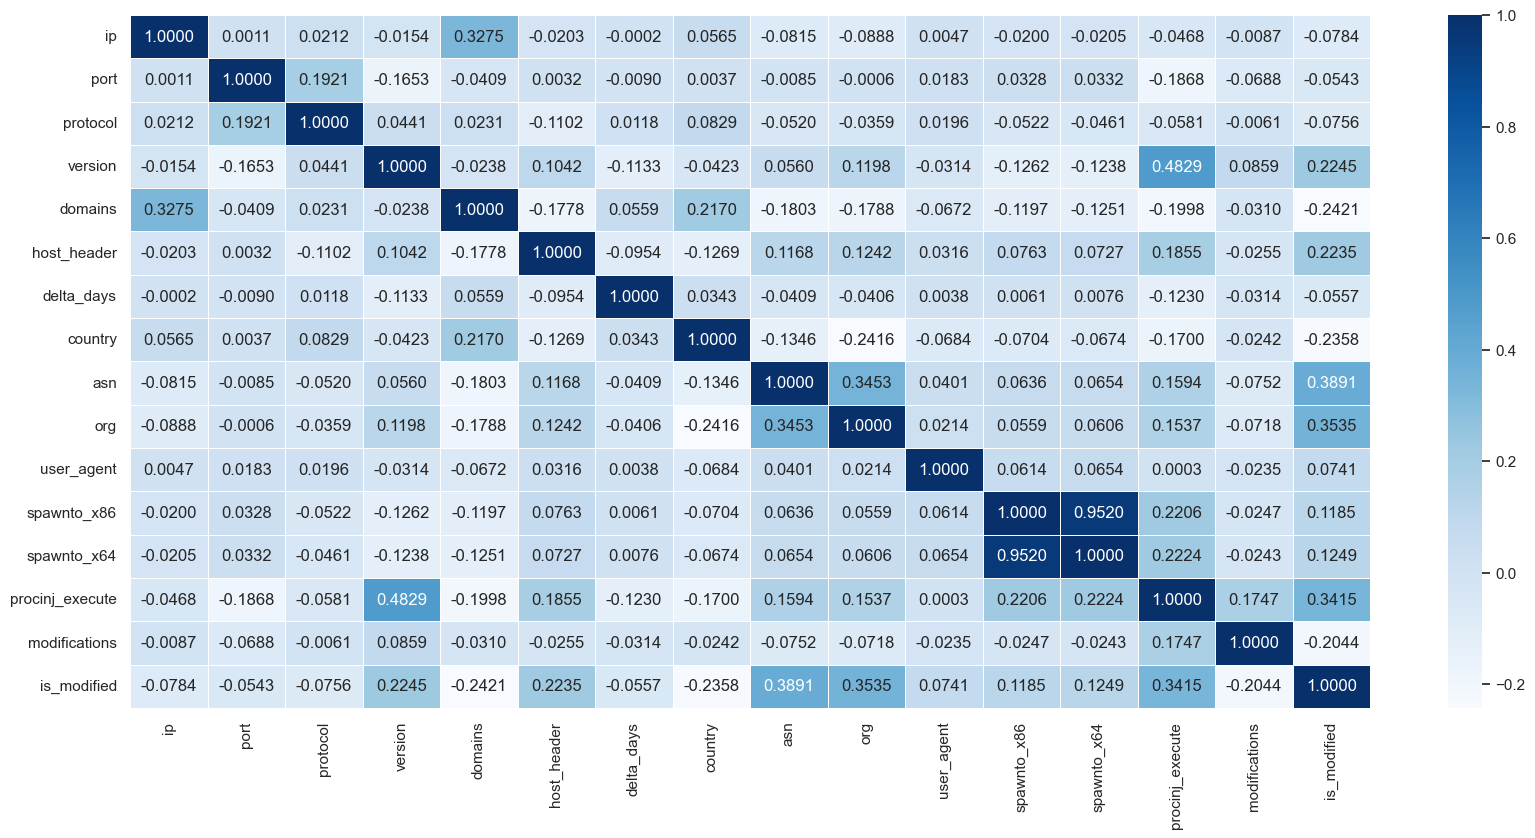

In [77]:
plt.figure(figsize = (20, 9)) #default pearson
sns.heatmap(df_analysis.corr(), annot = True, cmap = 'Blues', fmt = '.4f',linewidths = 0.6)

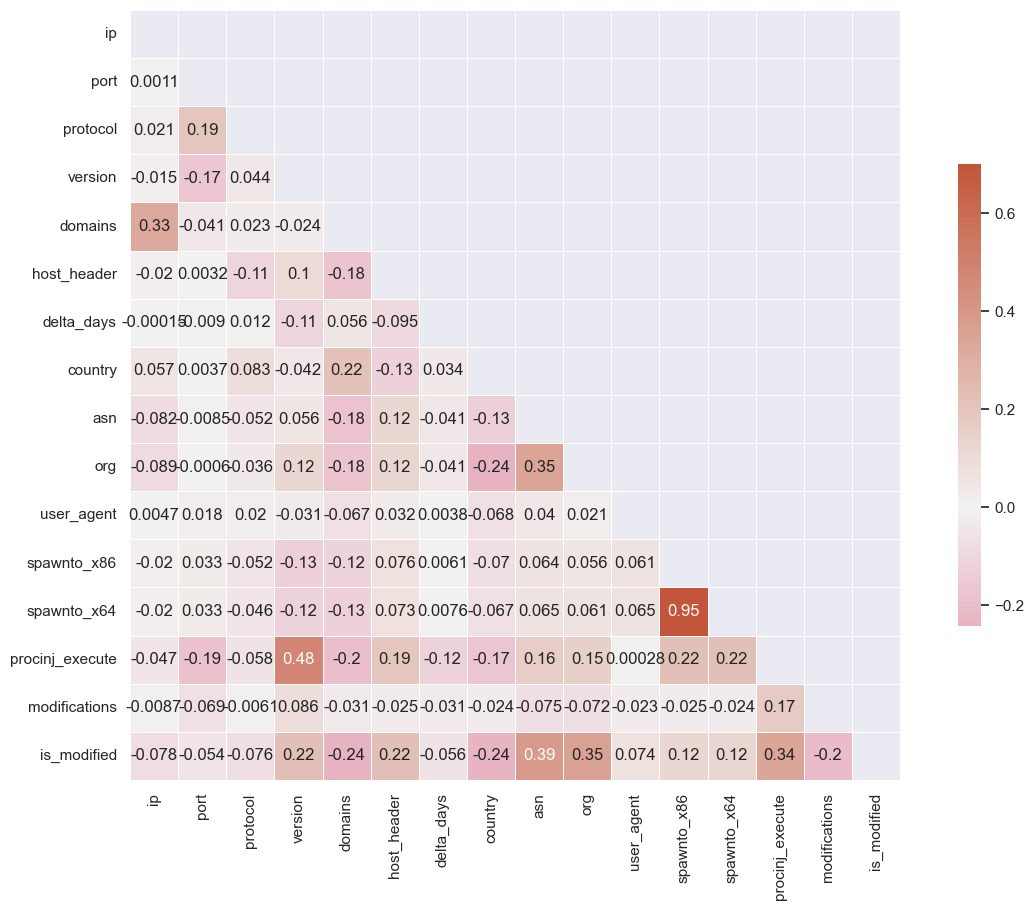

In [78]:
corr = df_analysis.corr()
cmap = sns.diverging_palette(1, 20, as_cmap=True)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 10))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.7, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .6});

In [79]:
# Importing Libraries
from kmodes.kmodes import KModes

In [80]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_analysis)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6669, cost: 278877.0
Run 1, iteration: 2/100, moves: 1251, cost: 278877.0


In [81]:
fitClusters_cao

array([4, 1, 1, ..., 2, 1, 3], dtype=uint16)

In [82]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df_analysis.columns

In [83]:
clusterCentroidsDf

ip  port  protocol  version  domains  host_header  delta_days  country  \
0   6973     2         2       13      665         2593           0       78   
1   2172     1         1       13    13082         2593           0       13   
2   7227     1         1       14     4414         2593           0       13   
3   4355     1         1       13    17864         2593           0       78   
4  11797     2         2        6    10546         2593           0       78   

   asn  org  user_agent  spawnto_x86  spawnto_x64  procinj_execute  \
0  123  158         780          193          182              249   
1  281  271         662          193          182              249   
2  342  563         941          193          182              249   
3  163   28         780          193          182              249   
4  139   20         662          193          182                0   

   modifications  is_modified  
0             15            1  
1             13            0  
2              1            1  
3             15            1  
4             13            0

In [84]:
km_huang = KModes(n_clusters=5, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df_analysis)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13178, cost: 290806.0
Run 1, iteration: 2/100, moves: 1384, cost: 290695.0
Run 1, iteration: 3/100, moves: 4, cost: 290695.0


In [85]:
fitClusters_huang

array([0, 1, 1, ..., 0, 2, 0], dtype=uint16)

In [86]:
beacon = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df_analysis)
    beacon.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 330427.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3863, cost: 307261.0
Run 1, iteration: 2/100, moves: 2482, cost: 305551.0
Run 1, iteration: 3/100, moves: 808, cost: 305539.0
Run 1, iteration: 4/100, moves: 3, cost: 305539.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4430, cost: 298608.0
Run 1, iteration: 2/100, moves: 2962, cost: 294014.0
Run 1, iteration: 3/100, moves: 953, cost: 294014.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3797, cost: 293550.0
Run 1, iteration: 2/100, moves: 2497, cost: 289285.0
Run 1, iteration: 3/100, moves: 1095, cost: 289276.0
Run 1, iteration: 4/100, moves: 0, cost: 289276.0


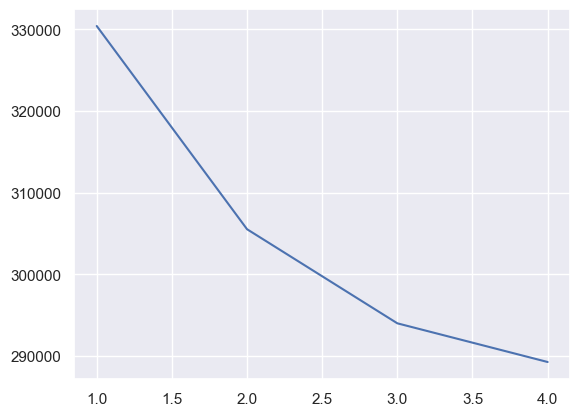

In [87]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,beacon)

In [88]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_analysis)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6669, cost: 278877.0
Run 1, iteration: 2/100, moves: 1251, cost: 278877.0


In [89]:
fitClusters_cao

array([4, 1, 1, ..., 2, 1, 3], dtype=uint16)

In [90]:
df_analysis = df_analysis_copy.reset_index()

In [91]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_analysis, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [92]:
combinedDf.head()

ip  port protocol                            version  \
0     81.95.5.146   443    https   Cobalt Strike 3.6 (Dec 08, 2016)   
1  122.116.41.237    80     http   Cobalt Strike 3.6 (Dec 08, 2016)   
2   51.255.42.170    80      dns   Cobalt Strike 3.4 (Jul 29, 2016)   
3    51.38.187.74   443    https   Cobalt Strike 3.8 (May 23, 2017)   
4   54.147.59.212    80     http  Cobalt Strike 3.10 (Dec 11, 2017)   

                                             domains   host_header  \
0                                        81.95.5.146           NaN   
1                                     122.116.41.237           NaN   
2  cdn.incdigest.com, freepics.incdigest.com, pro...           NaN   
3                                       51.38.187.74           NaN   
4                          ww2.foodprepsolutions.com  www.imdb.com   

   delta_days        country     asn                                org  \
0         145        Germany  201011           AS33891 Netzbetrieb GmbH   
1           0         Taiwan    3462  Data Communication Business Group   
2         154         France   16276                            OVH SAS   
3           0         France   16276                            OVH SAS   
4          43  United States   14618                         AMAZON-AES   

                                          user_agent  \
0  Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7....   
1  Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...   
2  Mozilla/5.0 (compatible; MSIE 10.0; Windows NT...   
3  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
4  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   

                      spawnto_x86                      spawnto_x64  \
0  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
1  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
2                               0                                0   
3  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
4  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   

  procinj_execute   modifications  is_modified  cluster_predicted  
0               0  modified_trial         True                  4  
1               0          normal        False                  1  
2               0          normal        False                  1  
3               0          normal        False                  4  
4               0          normal        False                  1

In [93]:
import csv
#export_df.to_csv("iocs-export_sem_index.csv",index=False)
#User agent
#correlação com algum dataset de dominio (com isso é possivel validar se foi utilizado dominio temporario, alexa top1m)
#quantidade de dias que um beacon ficou disponivel na internet
#analise do IP (avaliar se tem alguma API disponivel no trabalho)



combinedDf.to_csv("cluster6-export.csv", sep=";", quoting=csv.QUOTE_ALL, index=False)

In [94]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]

In [95]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14916 entries, 22 to 33786
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ip                 14916 non-null  object
 1   port               14916 non-null  int64 
 2   protocol           14916 non-null  object
 3   version            14916 non-null  object
 4   domains            14916 non-null  object
 5   host_header        4155 non-null   object
 6   delta_days         14916 non-null  int64 
 7   country            14916 non-null  object
 8   asn                14916 non-null  int64 
 9   org                14916 non-null  object
 10  user_agent         14915 non-null  object
 11  spawnto_x86        14916 non-null  object
 12  spawnto_x64        14916 non-null  object
 13  procinj_execute    14916 non-null  object
 14  modifications      14916 non-null  object
 15  is_modified        14916 non-null  bool  
 16  cluster_predicted  14916 non-null  uint

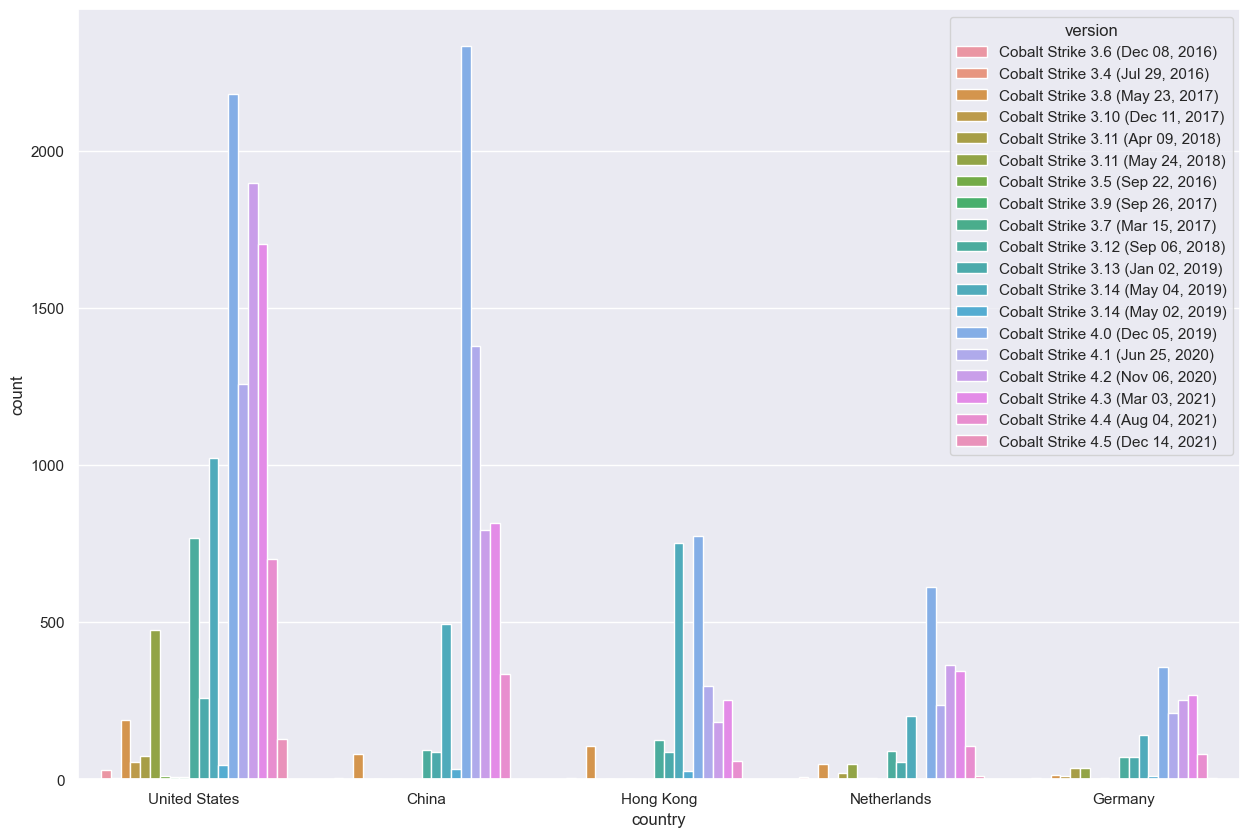

In [96]:
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['country'],order=combinedDf['country'].value_counts().iloc[:5].index,hue=combinedDf['version'])
plt.show()

ValueError: `element` must be 'bars' when `discrete` is True

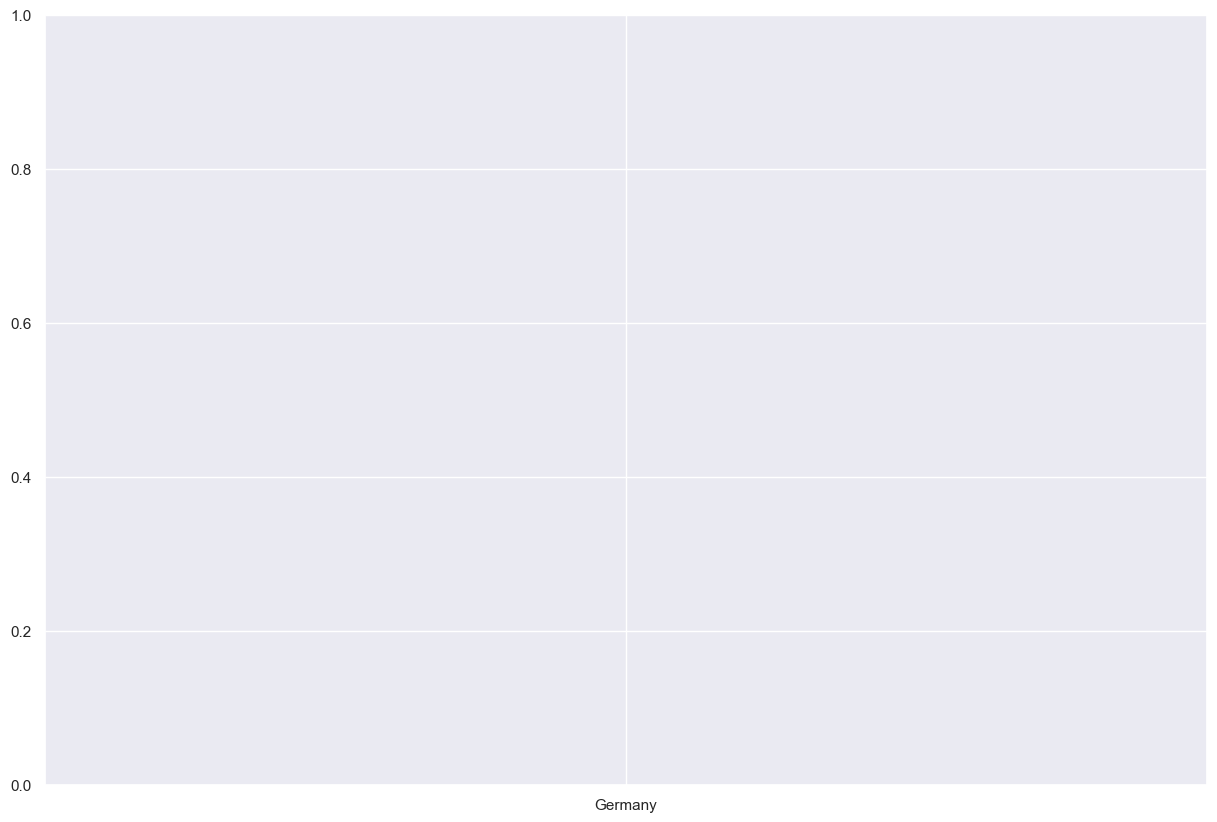

In [97]:
plt.subplots(figsize = (15,10))

sns.histplot(
    combinedDf, x="country", hue="version", element="step",
    stat="density", common_norm=False,
)

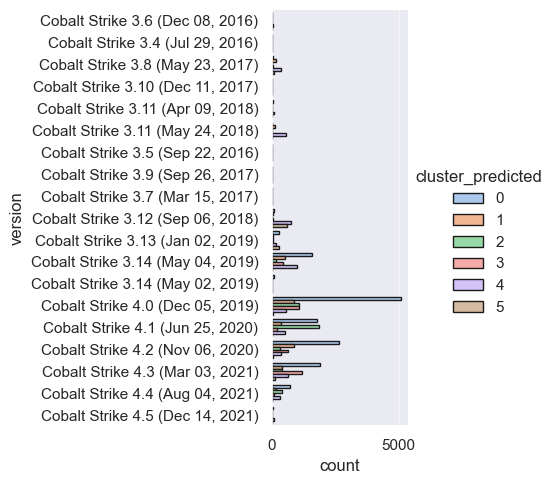

In [ ]:
sns.catplot(
    data=combinedDf, y='version', hue="cluster_predicted", kind="count",
    palette="pastel", edgecolor=".10"
)


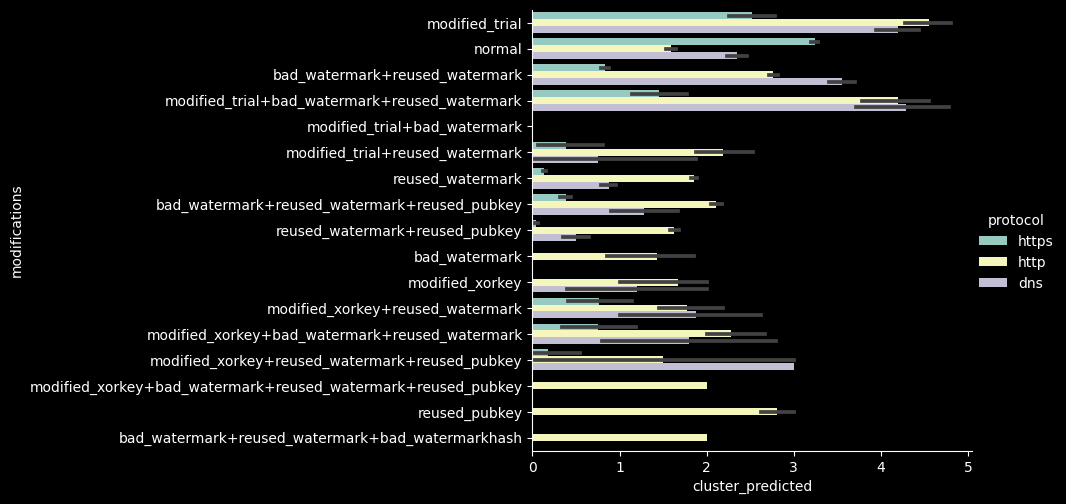

In [ ]:
sns.catplot(
    data=combinedDf, x="cluster_predicted", y="modifications", hue="protocol", kind="bar",
)

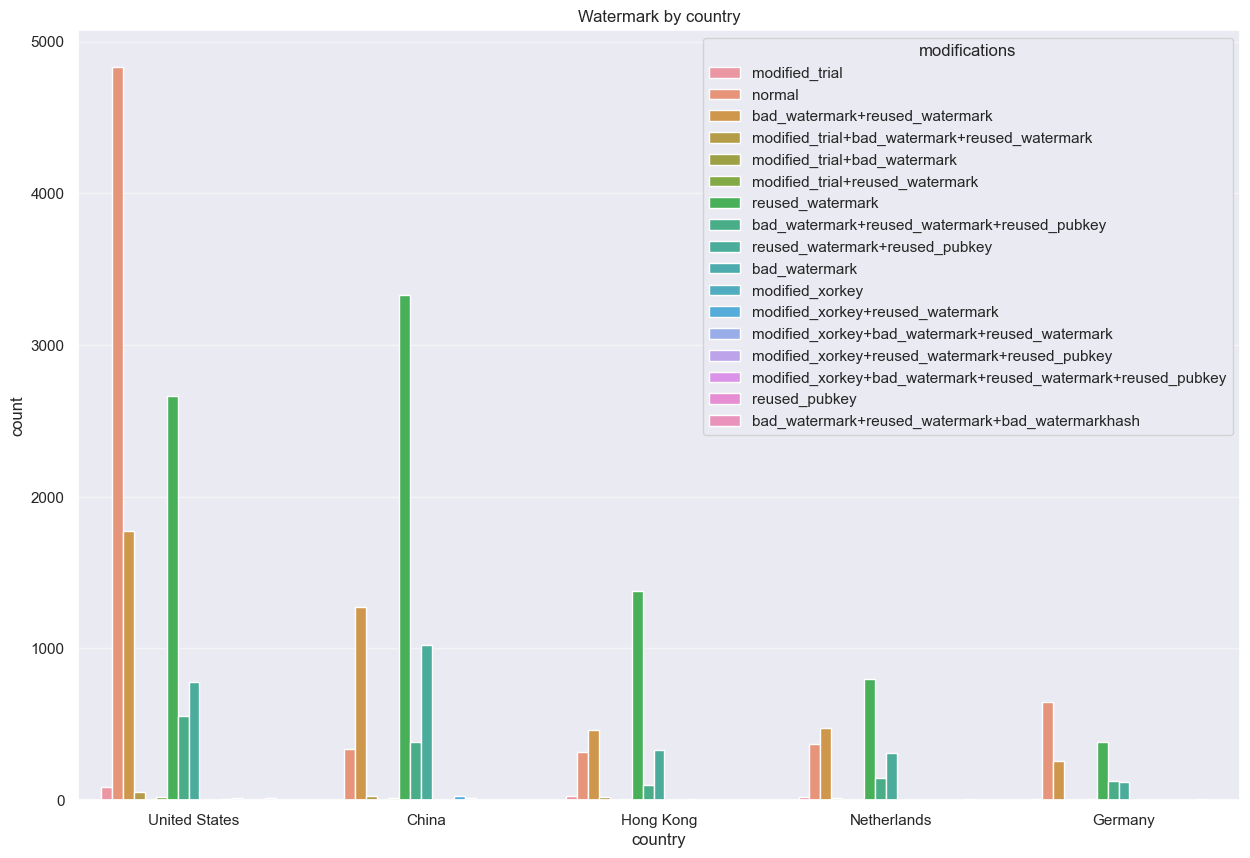

In [ ]:
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['country'],order=combinedDf['country'].value_counts().iloc[:5].index,hue=combinedDf['modifications']).set(title='Watermark by country')
plt.show()


#import seaborn as sns
#titanic = sns.load_dataset("titanic")
#sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d",
 #             order=titanic.deck.value_counts().iloc[:3].index)

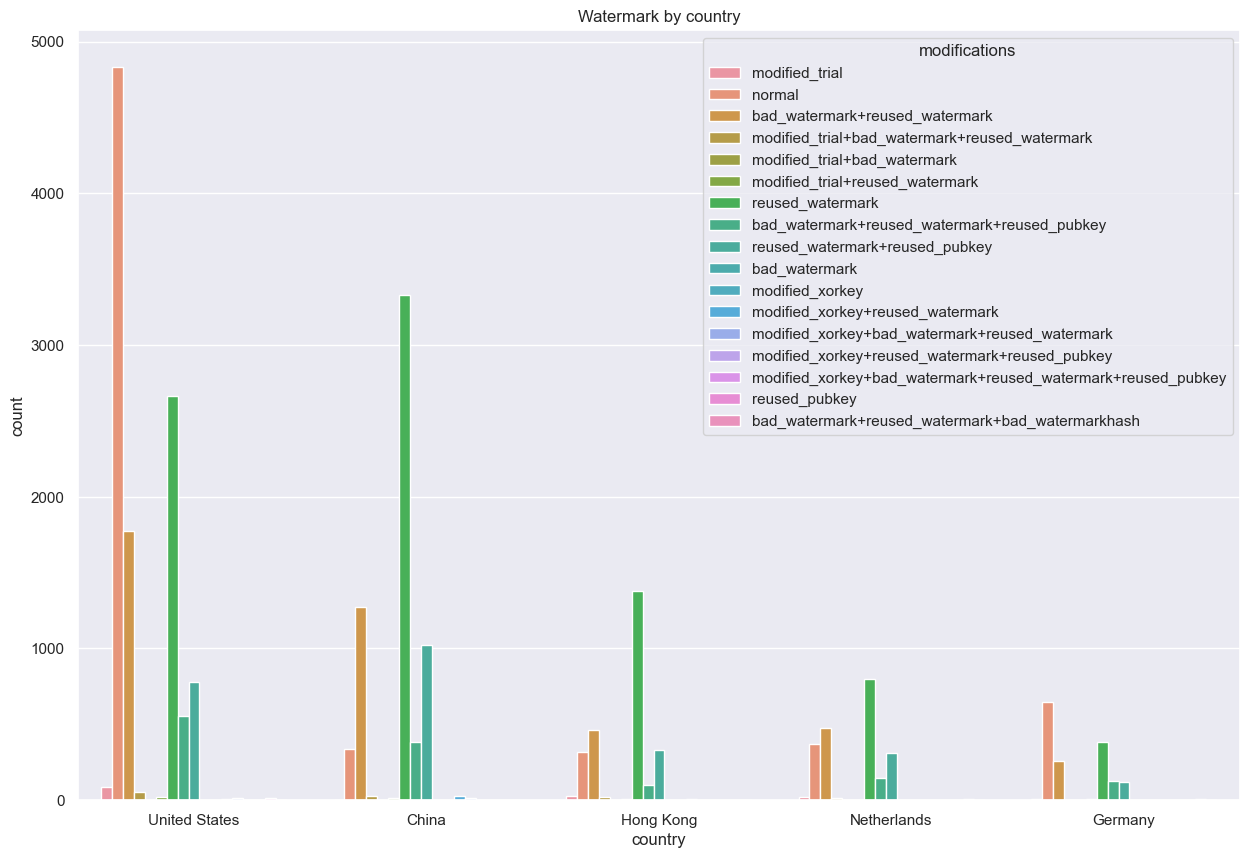

In [ ]:
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['country'],order=combinedDf['country'].value_counts().iloc[:5].index,hue=combinedDf['modifications']).set(title='Watermark by country')
plt.show()


#import seaborn as sns
#titanic = sns.load_dataset("titanic")
#sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d",
 #             order=titanic.deck.value_counts().iloc[:3].index)

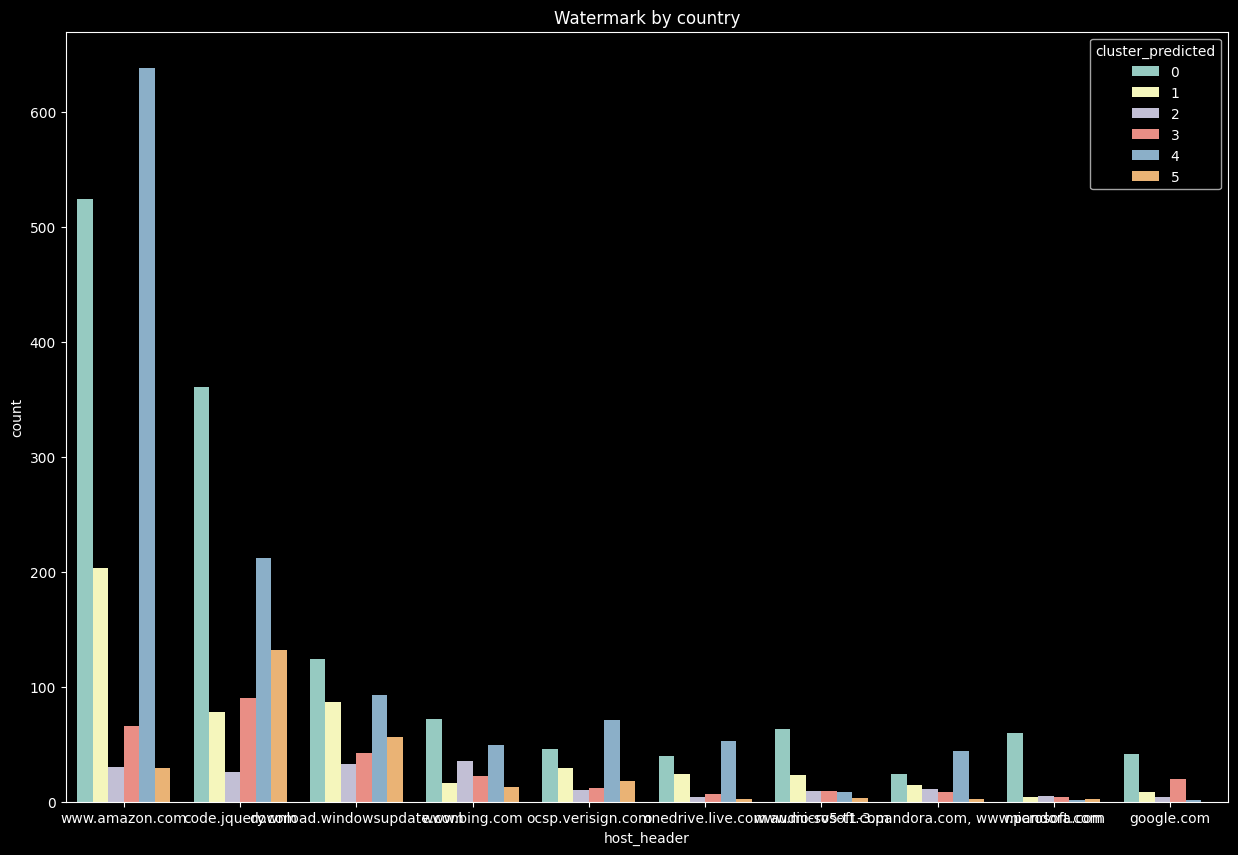

In [ ]:
plt.subplots(figsize = (15,10))
sns.countplot(x=combinedDf['host_header'],order=combinedDf['host_header'].value_counts().iloc[:10].index,hue=combinedDf['cluster_predicted']).set(title='Watermark by country')
plt.show()


#import seaborn as sns
#titanic = sns.load_dataset("titanic")
#sns.countplot(y="deck", hue="class", data=titanic, palette="Greens_d",
 #             order=titanic.deck.value_counts().iloc[:3].index)

In [ ]:
combinedDf["delta_days"].value_counts()

0      14731
14       876
5        854
6        799
13       776
       ...  
370        1
355        1
296        1
626        1
189        1
Name: delta_days, Length: 427, dtype: int64

In [ ]:
sns.set()

g = sns.catplot(data=combinedDf, x='is_modified', col='protocol', sharey=True, height=4, aspect=1, palette='rocket', kind='count')
g.set(xlabel='')
plt.tight_layout()
plt.show()

#sns.set(style="darkgrid", context="talk")
#plt.style.use("dark_background")
#x=combinedDf['country']

NameError: name 'combinedDf' is not defined

<AxesSubplot: xlabel='cluster_predicted', ylabel='count'>

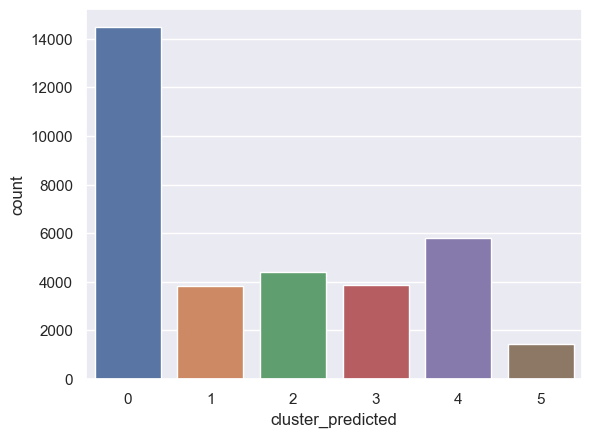

In [ ]:
df_plot = combinedDf[combinedDf['is_modified']]
sns.countplot(x='cluster_predicted', data=combinedDf[-(combinedDf.version == 'China')])

#With a dataframe df having a column mydata containing rows with text "No Information", 
#you can remove the rows while passing the data argument to the countplot method like this:

#sns.countplot(x="mydata", data=df[-(df.mydata == 'No Information')])

In [ ]:
from sklearn import metrics
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import plotly.express as px

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [ ]:
px.scatter(combinedDf, x = "cluster_predicted", y = "delta_days", color = 'is_modified', marginal_x = "histogram", marginal_y = "histogram")

In [ ]:
import pandas as pd;
import numpy as np;
import seaborn as sns; sns.set();
import matplotlib.pyplot as plt;
import plotly.express as px;
#https://www.flai.com.br/juscudilio/scatter-plot-um-guia-completo-para-graficos-de-dispersao/

In [ ]:
import plotly.express as px
fig  = px.scatter(combinedDf, x = 'version', y = 'is_modified', log_x = True, width = 800)
fig.update_traces(marker = dict(size = 12, line=dict(width = 2)), selector = dict(mode = 'markers'))
fig.update_layout(title = 'Logaritmo do PIB per capita X Expectativa de vida')
fig.update_xaxes(title = 'Log(PIB per capita)')
fig.update_yaxes(title = 'Expectativa de vida')
fig.show()

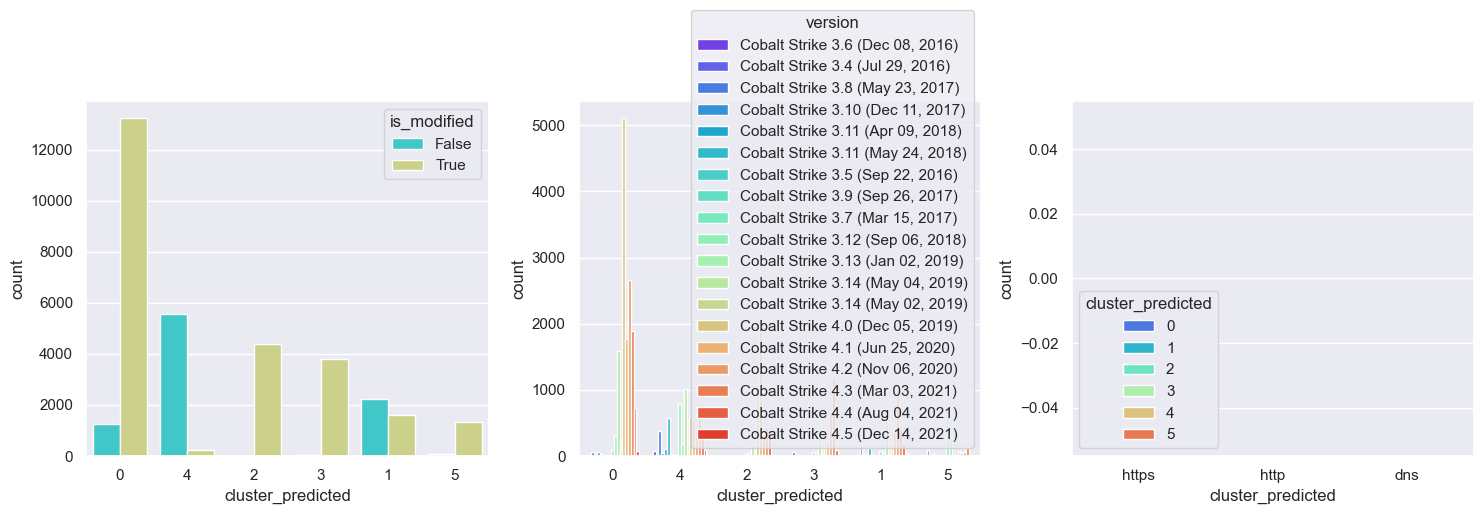

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['is_modified'],ax=axs[0],palette='rainbow')
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['cluster_predicted'].value_counts().index,hue=combinedDf['version'],ax=axs[1],palette='rainbow')
sns.countplot(x=combinedDf['cluster_predicted'],order=combinedDf['protocol'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2],palette='rainbow')

plt.tight_layout()
plt.show()

In [ ]:
df_cluster1 = combinedDf.query("cluster_predicted == 1")
df_cluster1 = combinedDf.query('cluster_predicted == 1 & spawnto_x86.str.contains("windir")')
#df_cluster1 = combinedDf.query('cluster_predicted == 1 & port == 80')

df_cluster1.head()

#df.query('Salary_in_1000 >= 100 & Age < 60 & FT_Team.str.startswith("S").values')
#df[(df['Salary_in_1000']>=100) & (df['Age']<60) & df['FT_Team'].str.startswith('S')][['Name','Age','Salary_in_1000']]
#df[df.eval("Salary_in_1000>=100 & (Age <60) & FT_Team.str.startswith('S').values")]
#https://kanoki.org/2020/01/21/pandas-dataframe-filter-with-multiple-conditions/

ip  port protocol                            version  \
1   122.116.41.237    80     http   Cobalt Strike 3.6 (Dec 08, 2016)   
4    54.147.59.212    80     http  Cobalt Strike 3.10 (Dec 11, 2017)   
29      77.81.7.90    80      dns  Cobalt Strike 3.10 (Dec 11, 2017)   
36  54.164.207.117    80     http  Cobalt Strike 3.10 (Dec 11, 2017)   
37     47.75.107.1    80     http   Cobalt Strike 3.8 (May 23, 2017)   

                                       domains   host_header  delta_days  \
1                               122.116.41.237           NaN           0   
4                    ww2.foodprepsolutions.com  www.imdb.com          43   
29                             auth-alstom.com           NaN         186   
36  ec2-54-164-207-117.compute-1.amazonaws.com           NaN         282   
37                                 47.75.107.1           NaN          30   

          country    asn                                org  \
1          Taiwan   3462  Data Communication Business Group   
4   United States  14618                         AMAZON-AES   
29         Sweden  42695      City Network International AB   
36  United States  14618                         AMAZON-AES   
37      Hong Kong  45102    Alibaba US Technology Co., Ltd.   

                                           user_agent  \
1   Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...   
4   Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
29  Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...   
36  Mozilla/6.0 (Windows NT 6.1; WOW64; Trident/7....   
37  Mozilla/4.0 (compatible; MSIE 7.0; Windows NT ...   

                       spawnto_x86                      spawnto_x64  \
1   %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
4   %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
29  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
36  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   
37  %windir%\syswow64\rundll32.exe  %windir%\sysnative\rundll32.exe   

   procinj_execute modifications  is_modified  cluster_predicted  
1                0        normal        False                  1  
4                0        normal        False                  1  
29               0        normal        False                  1  
36               0        normal        False                  1  
37               0        normal        False                  1

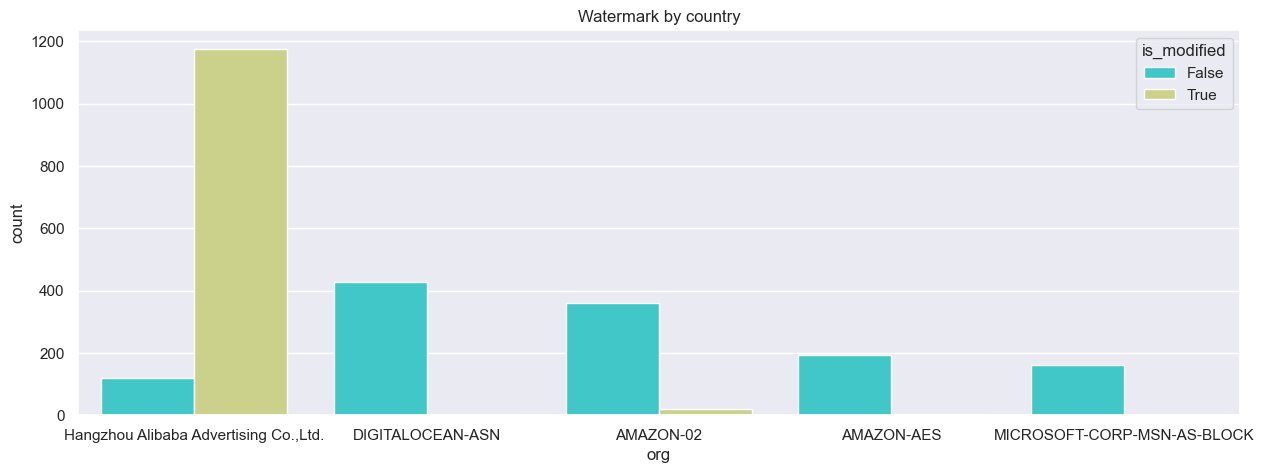

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(palette='rainbow', x=df_cluster1['org'],order=df_cluster1['org'].value_counts().iloc[:5].index,hue=df_cluster1['is_modified']).set(title='Watermark by country')
plt.show()


In [ ]:
px.scatter(df_cluster1, x = "org", y = "delta_days", color = 'is_modified', marginal_x = "histogram", marginal_y = "histogram")

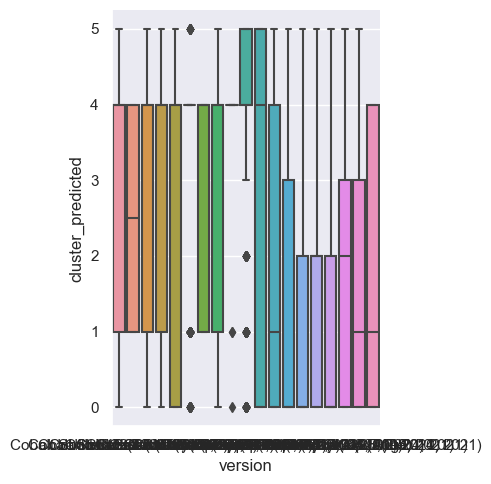

In [ ]:
sns.catplot(x='version', y='cluster_predicted', data=combinedDf, kind='box')

In [ ]:
#https://www.kaggle.com/code/ashydv/bank-customer-clustering-k-modes-clustering/notebook
#https://www.kaggle.com/code/halflingwizard/clustering-categorical-data-using-gower-distance
#https://www.youtube.com/watch?v=b39_vipRkUo
#https://github.com/nicodv/kmodes/tree/master/examples
#https://towardsdatascience.com/clustering-datasets-having-both-numerical-and-categorical-variables-ed91cdca0677
#https://towardsdatascience.com/clustering-on-numerical-and-categorical-features-6e0ebcf1cbad
#https://medium.com/analytics-vidhya/the-ultimate-guide-for-clustering-mixed-data-1eefa0b4743b
#https://www.linkedin.com/pulse/use-gower-distance-measure-diversity-bjoern-zapadlo/
#https://medium.com/analytics-vidhya/gowers-distance-899f9c4bd553
#https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/
#https://github.com/Sreemanto/Gower-s-Distance/blob/master/Gower's%20Measure.ipynb
#https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
#https://seaborn.pydata.org/tutorial/categorical.html
#https://www.kaggle.com/code/rocossa/dendrogram-hierarchical-clustering/notebook
#https://notepub.io/notes/programming-languages/python-seaborn-for-data-visualization/python-seaborn-for-data-visualization-scatter-plots/


#Cramer/Pearson


#https://www.kaggle.com/code/raphaelmarques/kmodes-clustering-in-cardio-data-86-acc
#https://www.kaggle.com/code/arikmitra/kmodes-clustering-to-find-personality
#https://www.kaggle.com/code/elenasm/movies-and-phobias-kmodes-clustering
#https://www.kaggle.com/code/ignacioalorre/clustering-features-based-on-correlation-and-tags
#https://www.kaggle.com/code/pateldeep7799/k-mode-clustering-on-banking-data